In [1]:
import pandas as pd
df = pd.read_csv('Crop_recommendation2.csv', na_values='=')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
df['label'].unique().size

22

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72064a2cd0>,
      dtype=object)

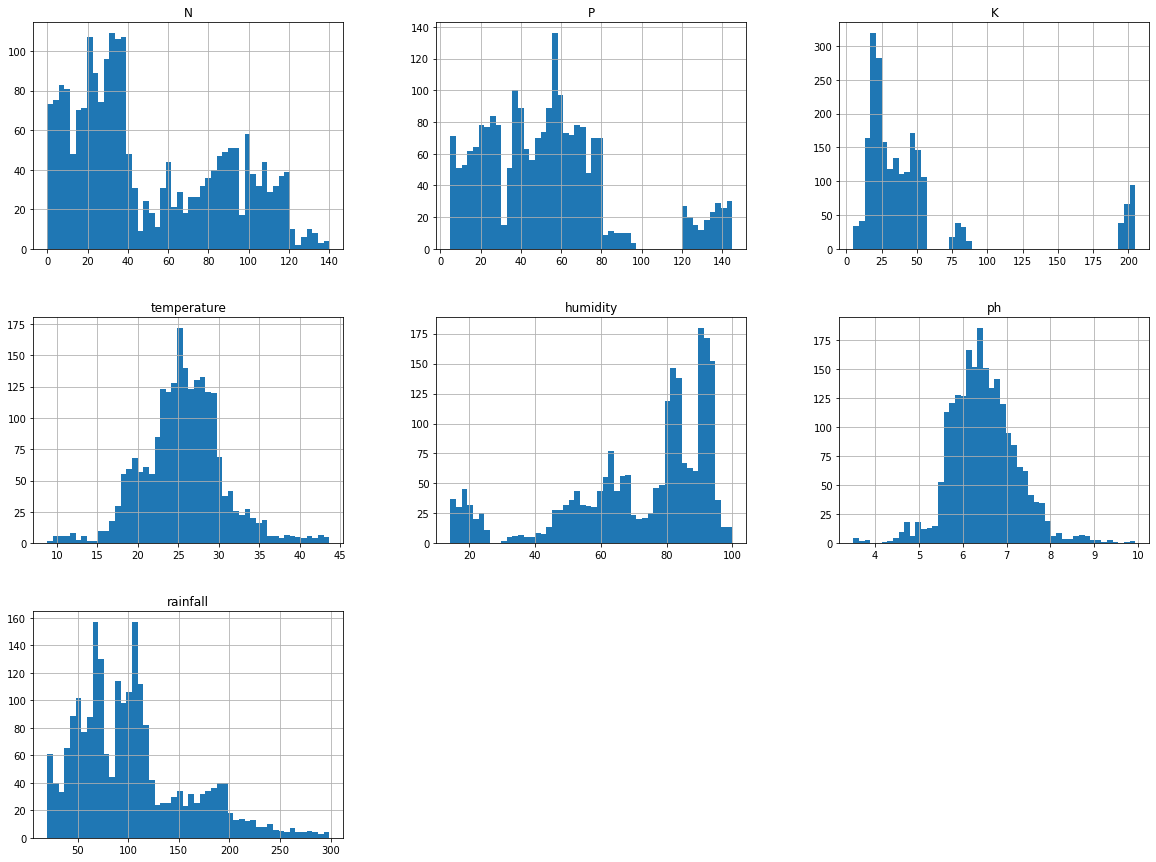

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7205da84c0>,
      dtype=object)

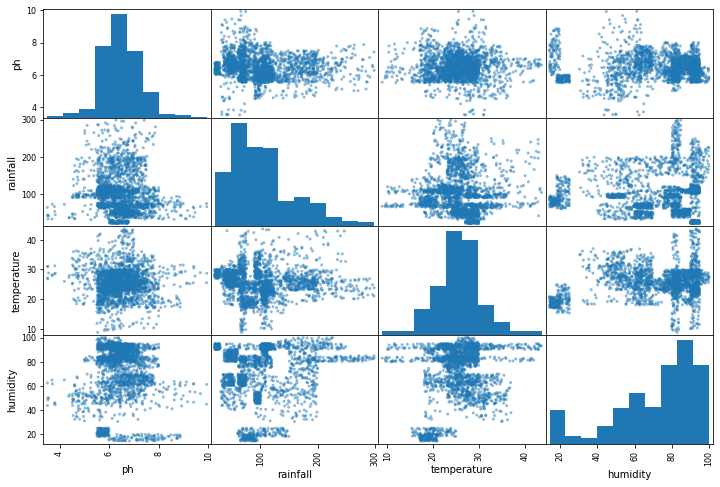

In [7]:
from pandas.plotting import scatter_matrix
attributes =["ph","rainfall", "temperature", "humidity"]
scatter_matrix(df[attributes], figsize = (12,8))

In [8]:
b = df['label']

In [9]:
df = df.drop('label', axis = 1)

In [10]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df, df['label']):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]

In [11]:
# b = strat_train_set.copy()
# b = strat_train_set.drop("label", axis = 1)
# b_labels = strat_train_set["label"].copy()

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)
# X = imputer.transform(b)
# b_transformed = pd.DataFrame(X, columns=b.columns)
# b_transformed.describe()

SimpleImputer(strategy='median')

In [13]:
imputer.statistics_

array([37.        , 51.        , 32.        , 25.5986932 , 80.47314567,
        6.42504527, 94.86762427])

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler())
])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
a = my_pipeline.fit_transform(df)
a = df

In [18]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.3, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNCmodel = KNeighborsClassifier()
KNCmodel.fit(X_train, y_train)
KNC_predictions = KNCmodel.predict(X_test)
# KNC_predictions

In [20]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
KNC_acc = accuracy_score(KNC_predictions, y_test)
KNC_acc_percent = (KNC_acc*100)
KNC_acc_percent

97.72727272727273

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier()
RFCmodel.fit(X_train, y_train)
RFC_predictions = RFCmodel.predict(X_test)

In [22]:
RFC_acc = accuracy_score(RFC_predictions, y_test)
RFC_acc_percent = (RFC_acc*100)
RFC_acc_percent

99.0909090909091

In [23]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)
NaiveBayes_predictions = NaiveBayes.predict(X_test)

In [24]:
NB_acc = accuracy_score(NaiveBayes_predictions, y_test)
NB_acc_percent = (NB_acc*100)
NB_acc_percent

99.39393939393939

In [25]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
LR_predictions = LRmodel.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
LR_acc = accuracy_score(LR_predictions, y_test)
LR_acc_percent = (LR_acc*100)
LR_acc_percent

94.84848484848484

In [27]:
test_input = [[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]]
print(RFCmodel.predict(test_input))

['rice']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
import pickle
pickle.dump(NaiveBayes, open('model.pkl','wb'))